# Mean Squared Error (MSE)

**Mean Squared Error (MSE)** measures the average squared difference between the predicted and actual values.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- A smaller MSE means better model performance.

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [21]:
data = pd.read_csv('Experience-Salary.csv')

In [22]:
data.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [23]:
data = data.sample(30)

In [24]:
X = data['exp(in months)'].values
Y = data['salary(in thousands)'].values

X_trans = X.reshape(-1, 1)

In [25]:
model = LinearRegression()
model.fit(X_trans, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
def MSE(y, y_pred):
    mse = 0
    for i in range(len(y_pred)):
        mse += (y[i] - y_pred[i]) ** 2
    mse = mse / len(y_pred)
    return mse
        

In [31]:
# Calculating MSE
mse = MSE(Y, model.predict(X_trans))
mse

31.846317907670883

## Problem with MSE and Why RMSE is Better

**MSE (Mean Squared Error)** squares the errors before averaging them.  
This causes **larger errors to dominate** the overall metric — even a few big mistakes can make the MSE value very high.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

Since the errors are squared, MSE is also in **squared units** of the target variable,  
which makes it **hard to interpret** directly.

To fix this, we use **RMSE (Root Mean Squared Error)**:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

Taking the square root brings the value **back to the original unit**,  
making it easier to understand and compare the model’s performance.


In [32]:
# Calculating RMSE
rmse = np.sqrt(MSE(Y, model.predict(X_trans)))
rmse

5.643254194848118

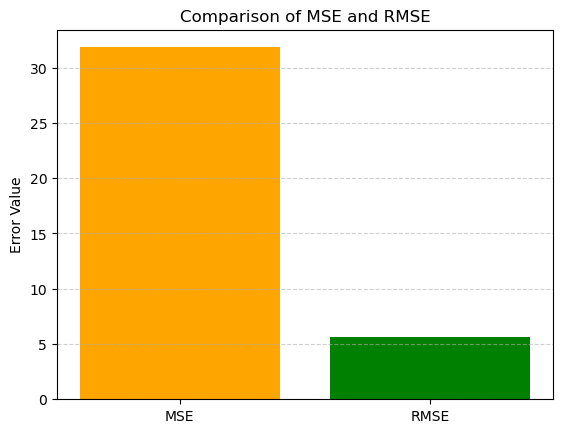

In [33]:
import matplotlib.pyplot as plt

plt.bar(['MSE', 'RMSE'], [mse, rmse], color=['orange', 'green'])
plt.title("Comparison of MSE and RMSE")
plt.ylabel("Error Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
